### Required libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import datetime

import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

import matplotlib.pyplot as plt


/home/fterroso/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Read required auxiliary files

In [7]:
dist_rel_df = pd.read_csv(os.path.join('data', 'mobility','relaciones_distrito_mitma.csv'), sep='|')

In [8]:
dist_rel_df.head()

,distrito,distrito_mitma,municipio_mitma
0,100101,01001_AM,01001_AM
1,100201,01002,01002
2,100301,01058_AM,01058_AM
3,100401,01010_AM,01010_AM
4,100601,01047_AM,01047_AM


In [ ]:
mun_rel_df = pd.read_csv(os.path.join('data', 'relaciones_municipio_mitma.csv'), sep='|')
mun_rel_df.head()

In [ ]:
mun_rel_df.info()

In [13]:
zones_gdf = gpd.read_file(os.path.join('data','mobility','zones_MA','distritos_mitma.shp'))
zones_gdf = zones_gdf.set_index('ID')
zones_gdf.head()

,geometry
ID,
2408910,"POLYGON ((290940.137 4719080.203, 290956.704 4..."
22117_AM,"POLYGON ((774184.362 4662152.523, 774452.348 4..."
2305009,"POLYGON ((429744.982 4179976.538, 429716.997 4..."
07058_AM,"POLYGON ((1000859.396 4415059.160, 1000625.088..."
2305006,"POLYGON ((429795.125 4180956.539, 429860.816 4..."


In [34]:
zones_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2850 entries, 2408910 to 50182
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  2850 non-null   geometry
dtypes: geometry(1)
memory usage: 44.5+ KB


In [18]:
zones_gdf.crs

<Derived Projected CRS: EPSG:3042>
Name: ETRS89 / UTM zone 30N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
zones_SNSI_gdf = gpd.read_file(os.path.join('data','mobility','zones_SNSI','Municipios_IGN.shp'))
zones_SNSI_gdf= zones_SNSI_gdf.to_crs('EPSG:3042')
zones_SNSI_gdf.head()

,FID,INSPIREID,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,SHAPE_Leng,SHAPE_Area,geometry
0,1,ES.IGN.SIGLIM34081616266,34081616266,Villarejo-Periesteban,ES4,ES42,ES423,16266,0.269748,0.003520,"POLYGON ((544643.251 4414598.723, 544641.251 4..."
1,2,ES.IGN.SIGLIM34081616269,34081616269,Villares del Saz,ES4,ES42,ES423,16269,0.447608,0.007382,"POLYGON ((535353.139 4412070.757, 535411.139 4..."
2,3,ES.IGN.SIGLIM34081616270,34081616270,Villarrubio,ES4,ES42,ES423,16270,0.305394,0.002978,"POLYGON ((503054.977 4423066.017, 503218.977 4..."
3,4,ES.IGN.SIGLIM34081616271,34081616271,Villarta,ES4,ES42,ES423,16271,0.283123,0.002680,"POLYGON ((613511.385 4369525.601, 614072.384 4..."
4,5,ES.IGN.SIGLIM34081616272,34081616272,Villas de la Ventosa,ES4,ES42,ES423,16272,0.595828,0.015355,"POLYGON ((542589.485 4457402.762, 542617.486 4..."


In [35]:
zones_SNSI_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         8205 non-null   int64   
 1   INSPIREID   8205 non-null   object  
 2   NATCODE     8205 non-null   object  
 3   NAMEUNIT    8205 non-null   object  
 4   CODNUT1     8205 non-null   object  
 5   CODNUT2     8205 non-null   object  
 6   CODNUT3     8205 non-null   object  
 7   CODIGOINE   8205 non-null   object  
 8   SHAPE_Leng  8205 non-null   float64 
 9   SHAPE_Area  8205 non-null   float64 
 10  geometry    8205 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(7)
memory usage: 705.2+ KB


In [23]:
zones_SNSI_gdf.crs

<Derived Projected CRS: EPSG:3042>
Name: ETRS89 / UTM zone 30N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
ax=zones_gdf.boundary.plot(figsize=(40,40),linewidth=0.8, color='red');
ax.set_axis_off()
plt.tight_layout()
plt.savefig(os.path.join('figs', 'zones_ma.png'))

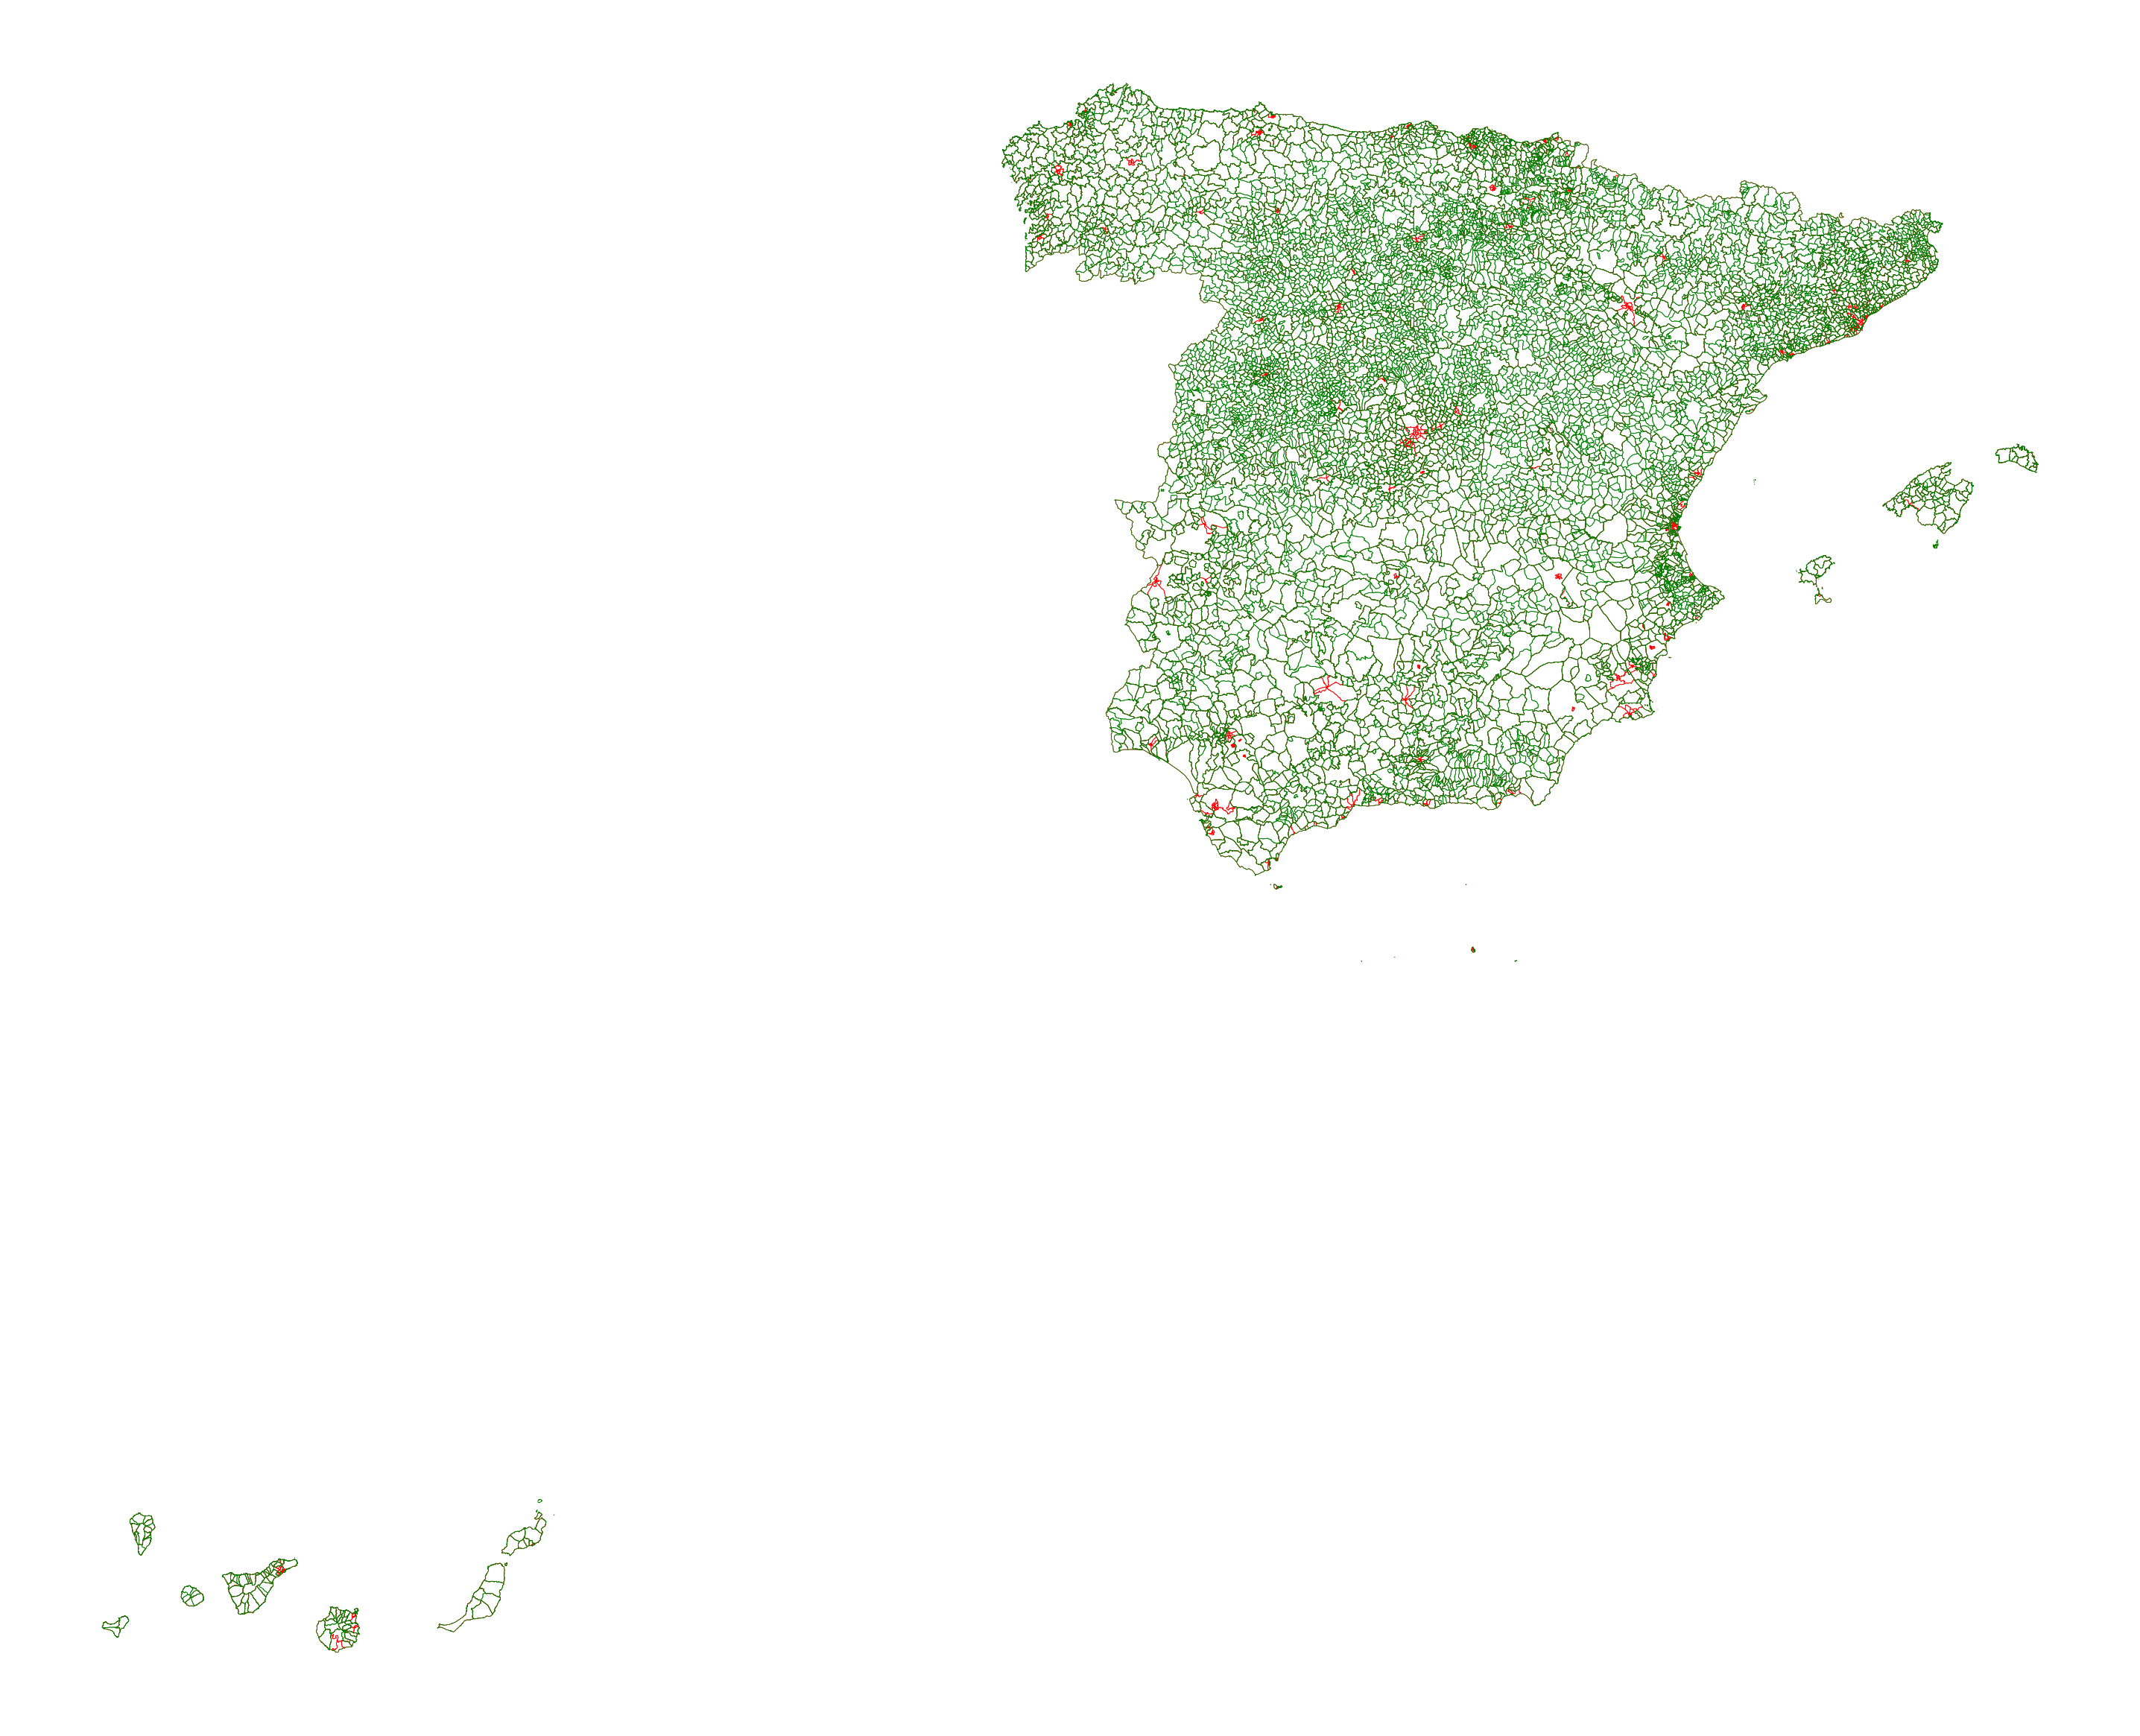

In [33]:
ax=zones_gdf.boundary.plot(figsize=(40,40),linewidth=0.8, color='red');
zones_SNSI_gdf.boundary.plot(ax=ax,linewidth=0.8, color='green');
ax.set_axis_off()
plt.tight_layout()
plt.savefig(os.path.join('figs', 'diff_tessellation.png'))

## Merge the two relational dataframes

In [8]:
rel_df= dist_rel_df.merge(mun_rel_df, how='left', on='municipio_mitma')

In [9]:
rel_df= rel_df['distrito_mitma municipio'.split()]
rel_df['municipio'] = rel_df['municipio'].astype(str)
rel_df['municipio'] = rel_df['municipio'].apply(lambda x: x.zfill(5))

In [10]:
rel_df = rel_df.drop_duplicates('distrito_mitma municipio'.split())

In [11]:
rel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8773 entries, 0 to 104169
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   distrito_mitma  8773 non-null   object
 1   municipio       8773 non-null   object
dtypes: object(2)
memory usage: 205.6+ KB


In [12]:
rel_df.head()

,distrito_mitma,municipio
0,01001_AM,01001
1,01001_AM,01009
2,01001_AM,01013
3,01001_AM,01021
4,01001_AM,01027


In [13]:
rel_df[rel_df['distrito_mitma']=='0200308']

,distrito_mitma,municipio
414,0200308,02003


Number of cities per MA

In [14]:
mun_per_ma= rel_df.groupby('distrito_mitma').count()

In [15]:
mun_per_ma.head()

,municipio
distrito_mitma,
01001_AM,7
01002,1
01010_AM,3
01031_AM,13
01036,1


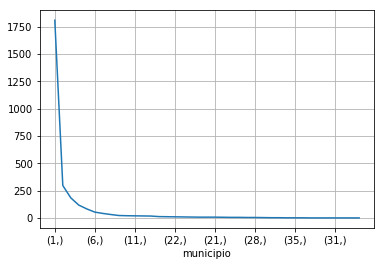

In [16]:
mun_per_ma.value_counts().plot(grid=True);

In [17]:
mun_per_ma.loc['0200308']

municipio    1
Name: 0200308, dtype: int64

Number of MAs per city

In [18]:
ma_per_mun= rel_df.groupby('municipio').count()

In [19]:
ma_per_mun.head()

,distrito_mitma
municipio,
01001,1
01002,1
01003,1
01004,1
01006,1


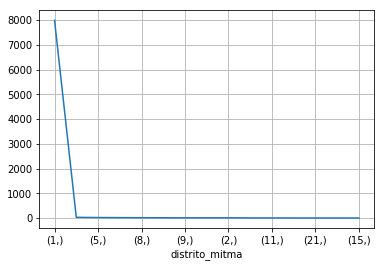

In [20]:
ma_per_mun.value_counts().plot(grid=True);

In [21]:
ma_w_single= mun_per_ma[mun_per_ma['municipio']>=1].index.to_list()

In [22]:
'0200308' in ma_w_single

True

## Enrich tourist info with MAs

In [23]:
mun_tourist_gdf = gpd.read_file(os.path.join('data','mun_tourist.geojson'),driver='GeoJSON')
mun_tourist_gdf.head()

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,16266,34081616266,33.429,0.0,0.00,Villarejo-Periesteban,0.0,0.000000,0.0,0.0,382,190,192,0.000000,0.000000,0.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39..."
1,16269,34081616269,70.160,1.0,0.15,Villares,0.0,0.000000,0.0,0.0,414,211,203,0.002415,0.000000,0.0,0.014253,0.000000,0.0,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39..."
2,16270,34081616270,28.256,0.0,0.00,Villarrubio,1.0,0.000066,0.0,0.0,191,107,84,0.000000,0.005236,0.0,0.000000,0.035391,0.0,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39..."
3,16271,34081616271,25.616,0.0,0.00,Villarta,0.0,0.000000,0.0,0.0,843,412,431,0.000000,0.000000,0.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39..."
4,16272,34081616272,145.106,3.0,0.48,Villas,0.0,0.000000,0.0,0.0,213,122,91,0.014085,0.000000,0.0,0.020675,0.000000,0.0,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40..."


In [24]:
mun_tourist_gdf[mun_tourist_gdf['Name']=='Madrid']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
472,28079,34132828079,604.98,16.894,1.1,Madrid,519.0,0.034348,0.0,0.0,3334730,1553899,1780831,0.000005,0.000156,0.0,0.027925,0.85788,0.0,"MULTIPOLYGON (((-3.88558 40.57446, -3.88522 40..."


In [25]:
mun_tourist_gdf.shape

(8124, 20)

### Case I: MAs covering one or more cities

MAs with more than one city

In [26]:
mun_per_ma.head()

,municipio
distrito_mitma,
01001_AM,7
01002,1
01010_AM,3
01031_AM,13
01036,1


In [27]:
ma_w_mul_mun= mun_per_ma[mun_per_ma['municipio']>1].index.to_list()
rel1_df = rel_df[rel_df['distrito_mitma'].isin(ma_w_mul_mun)]
rel1_df.head()

,distrito_mitma,municipio
0,01001_AM,01001
1,01001_AM,01009
2,01001_AM,01013
3,01001_AM,01021
4,01001_AM,01027


MAs with only one city

In [28]:
ma_w_single_mun= mun_per_ma[mun_per_ma['municipio']==1].index.to_list()
mun_w_single_ma= ma_per_mun[ma_per_mun['distrito_mitma']==1].index.to_list()
single_mun_with_single_ma = rel_df[(rel_df['distrito_mitma'].isin(ma_w_single_mun)) & 
                                  (rel_df['municipio'].isin(mun_w_single_ma))]
single_mun_with_single_ma.head()

,distrito_mitma,municipio
7,01002,01002
213,01036,01036
287,01051,01051
450,02009,02009
576,02025,02025


In [29]:
mun_to_fuse1 = rel1_df['municipio'].unique()
mun_to_fuse2 = single_mun_with_single_ma['municipio'].unique()

In [30]:
mun_to_fuse=np.concatenate((mun_to_fuse1, mun_to_fuse2))

In [31]:
'02003' in mun_to_fuse

False

In [32]:
mun_tourist1_gdf= mun_tourist_gdf[mun_tourist_gdf['CODIGOINE'].isin(mun_to_fuse)]

In [33]:
mun_tourist1_gdf[mun_tourist1_gdf['CODIGOINE']=='09060']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry
4930,09060,34070909060,18.562,2.0,0.98,Busto,0.0,0.0,0.0,0.0,133,71,62,0.015038,0.0,0.0,0.107747,0.0,0.0,"MULTIPOLYGON (((-3.29507 42.64863, -3.29392 42..."


In [34]:
munma_tourist1_gdf= mun_tourist1_gdf.merge(rel_df, how='left', left_on='CODIGOINE', right_on='municipio')
munma_tourist1_gdf = munma_tourist1_gdf.rename(columns={'distrito_mitma':'primary_key'})
munma_tourist1_gdf = munma_tourist1_gdf.drop('municipio',axis=1)

In [35]:
munma_tourist1_gdf.head()

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,...,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry,primary_key
0,16266,34081616266,33.429,0.0,0.00,Villarejo-Periesteban,0.0,0.000000,0.0,0.0,...,190,192,0.000000,0.000000,0.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...",16191_AM
1,16269,34081616269,70.160,1.0,0.15,Villares,0.0,0.000000,0.0,0.0,...,211,203,0.002415,0.000000,0.0,0.014253,0.000000,0.0,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...",16191_AM
2,16270,34081616270,28.256,0.0,0.00,Villarrubio,1.0,0.000066,0.0,0.0,...,107,84,0.000000,0.005236,0.0,0.000000,0.035391,0.0,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...",16027_AM
3,16271,34081616271,25.616,0.0,0.00,Villarta,0.0,0.000000,0.0,0.0,...,412,431,0.000000,0.000000,0.0,0.000000,0.000000,0.0,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...",16125_AM
4,16272,34081616272,145.106,3.0,0.48,Villas,0.0,0.000000,0.0,0.0,...,122,91,0.014085,0.000000,0.0,0.020675,0.000000,0.0,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...",16023_AM


In [36]:
munma_tourist1_gdf[munma_tourist1_gdf['primary_key']=='09238_AM']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,hotels-total,hotels-rel,camps-total,camps-rel,...,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area,geometry,primary_key
4792,09013,34070909013,8.219,0.0,0.00,Altable,0.0,0.000000,0.0,0.000000,...,27,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-3.09866 42.60184, -3.09729 42...",09238_AM
4794,09016,34070909016,12.509,0.0,0.00,Ameyugo,0.0,0.000000,0.0,0.000000,...,56,57,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-3.08415 42.64069, -3.08223 42...",09238_AM
4817,09043,34070909043,46.721,1.0,0.40,Barrios,0.0,0.000000,0.0,0.000000,...,106,73,0.005587,0.000000,0.000000,0.021404,0.000000,0.000000,"MULTIPOLYGON (((-3.42500 42.63643, -3.42498 42...",09238_AM
4825,09052,34070909052,7.838,0.0,0.00,Berzosa,0.0,0.000000,0.0,0.000000,...,22,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-3.29978 42.60958, -3.29797 42...",09238_AM
4826,09054,34070909054,33.160,1.0,0.81,Bozoó,0.0,0.000000,0.0,0.000000,...,60,37,0.010309,0.000000,0.000000,0.030157,0.000000,0.000000,"MULTIPOLYGON (((-3.13981 42.73300, -3.14018 42...",09238_AM
4829,09057,34070909057,9.927,1.0,0.82,Bugedo,1.0,0.000066,0.0,0.000000,...,121,66,0.005348,0.005348,0.000000,0.100735,0.100735,0.000000,"MULTIPOLYGON (((-3.04079 42.64005, -3.03887 42...",09238_AM
4831,09060,34070909060,18.562,2.0,0.98,Busto,0.0,0.000000,0.0,0.000000,...,71,62,0.015038,0.000000,0.000000,0.107747,0.000000,0.000000,"MULTIPOLYGON (((-3.29507 42.64863, -3.29392 42...",09238_AM
4847,09077,34070909077,7.919,0.0,0.00,Cascajares,0.0,0.000000,0.0,0.000000,...,14,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-3.25485 42.69135, -3.25352 42...",09238_AM
4864,09102,34070909102,16.818,0.0,0.00,Cillaperlata,0.0,0.000000,0.0,0.000000,...,21,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-3.41860 42.78592, -3.41781 42...",09238_AM
4874,09115,34070909115,9.802,0.0,0.00,Cubo,0.0,0.000000,0.0,0.000000,...,54,41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-3.22546 42.64904, -3.22541 42...",09238_AM


Aggregate the cities info into single MA container

In [37]:
agg_munma_tourist1_df= munma_tourist1_gdf[['area_km2', 'Viv-total', 'Name',
       'hotels-total', 'camps-total', 'POB20', 'HOMBRES', 'MUJERES', 'primary_key']]
agg_munma_tourist1_df= agg_munma_tourist1_df.groupby('primary_key').sum()

In [38]:
agg_munma_tourist1_df['Viv-per-area']= agg_munma_tourist1_df['Viv-total'] / agg_munma_tourist1_df['area_km2']
agg_munma_tourist1_df['hotels-per-area']= agg_munma_tourist1_df['hotels-total'] / agg_munma_tourist1_df['area_km2']
agg_munma_tourist1_df['camps-per-area']= agg_munma_tourist1_df['camps-total'] / agg_munma_tourist1_df['area_km2']

In [39]:
agg_munma_tourist1_df['geometry']= zones_gdf['geometry']
agg_munma_tourist1_df = agg_munma_tourist1_df.reset_index()

In [40]:
agg_munma_tourist1_gdf = gpd.GeoDataFrame(agg_munma_tourist1_df, geometry='geometry')

In [41]:
agg_munma_tourist1_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((543638.233 4737457.613, 543361.544 4..."
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((502019.579 4753948.366, 501874..."
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((499938.436 4768365.760, 499305.175 4..."
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((542515.689 4705413.036, 542580..."
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((505001.864 4776212.132, 505252.582 4..."


In [42]:
agg_munma_tourist1_gdf[agg_munma_tourist1_gdf['primary_key']=='02003']

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry


Cities covering more than one MA

In [43]:
mun_tourist2_gdf= mun_tourist_gdf[~mun_tourist_gdf['CODIGOINE'].isin(mun_to_fuse)]
mun_tourist2_gdf['primary_key']=mun_tourist2_gdf['CODIGOINE']

mun_tourist2_gdf= mun_tourist2_gdf[['area_km2', 'Viv-total', 'hotels-total', 'camps-total', 'hotels-per-area', 'Viv-per-area', 'camps-per-area', 'POB20', 'HOMBRES', 'MUJERES', 'primary_key', 'geometry']]

/home/fterroso/python/lib/python3.6/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [44]:
mun_tourist2_gdf.head()

,area_km2,Viv-total,hotels-total,camps-total,hotels-per-area,Viv-per-area,camps-per-area,POB20,HOMBRES,MUJERES,primary_key,geometry
112,220.006,759.0,84.0,2.0,0.381808,3.449906,0.009091,97848,45472,52376,15078,"MULTIPOLYGON (((-8.63079 42.94964, -8.62841 42..."
194,329.786,168.0,34.0,0.0,0.103097,0.509421,0.000000,98519,45568,52951,27028,"MULTIPOLYGON (((-7.73527 42.97301, -7.72908 42..."
295,84.554,197.0,16.0,0.0,0.189228,2.329872,0.000000,105643,47891,57752,32054,"MULTIPOLYGON (((-8.00345 42.34467, -8.00310 42..."
369,118.224,315.0,17.0,0.0,0.143795,2.664434,0.000000,83260,39344,43916,36038,"MULTIPOLYGON (((-8.61463 42.34593, -8.61471 42..."
388,109.577,758.0,32.0,2.0,0.292032,6.917510,0.018252,296692,140164,156528,36057,"MULTIPOLYGON (((-8.91021 42.19698, -8.91024 42..."


In [45]:
mun_tourist2_gdf[mun_tourist2_gdf['primary_key']=='02003']

,area_km2,Viv-total,hotels-total,camps-total,hotels-per-area,Viv-per-area,camps-per-area,POB20,HOMBRES,MUJERES,primary_key,geometry
6932,1126.992,144.0,31.0,1.0,0.027507,0.127774,0.000887,174336,85214,89122,02003,"MULTIPOLYGON (((-2.18035 39.10000, -2.16738 39..."


We set the two geodataframes with the same CRS

In [46]:
mun_tourist2_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
agg_munma_tourist1_gdf=agg_munma_tourist1_gdf.to_crs(mun_tourist2_gdf.crs)

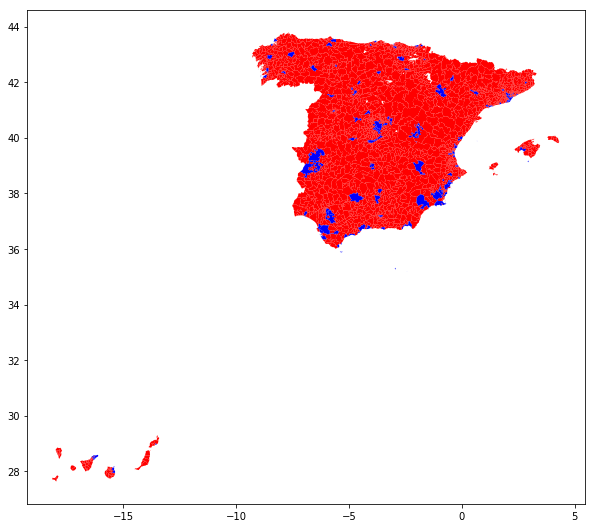

In [48]:
ax=agg_munma_tourist1_gdf.plot(color='red', figsize=(10,10));
mun_tourist2_gdf.plot(ax=ax, color='blue');

In [49]:
agg_mun_tourist_gdf=agg_munma_tourist1_gdf.append(mun_tourist2_gdf)

In [50]:
agg_mun_tourist_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803..."
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42..."
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((-3.00076 43.06800, -3.00853 43.06362..."
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((-2.48257 42.49991, -2.48180 42..."
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658..."


In [51]:
agg_mun_tourist_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2208 entries, 0 to 8107
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   primary_key      2208 non-null   object  
 1   area_km2         2208 non-null   float64 
 2   Viv-total        2208 non-null   float64 
 3   hotels-total     2208 non-null   float64 
 4   camps-total      2208 non-null   float64 
 5   POB20            2208 non-null   int64   
 6   HOMBRES          2208 non-null   int64   
 7   MUJERES          2208 non-null   int64   
 8   Viv-per-area     2208 non-null   float64 
 9   hotels-per-area  2208 non-null   float64 
 10  camps-per-area   2208 non-null   float64 
 11  geometry         2208 non-null   geometry
dtypes: float64(7), geometry(1), int64(3), object(1)
memory usage: 224.2+ KB


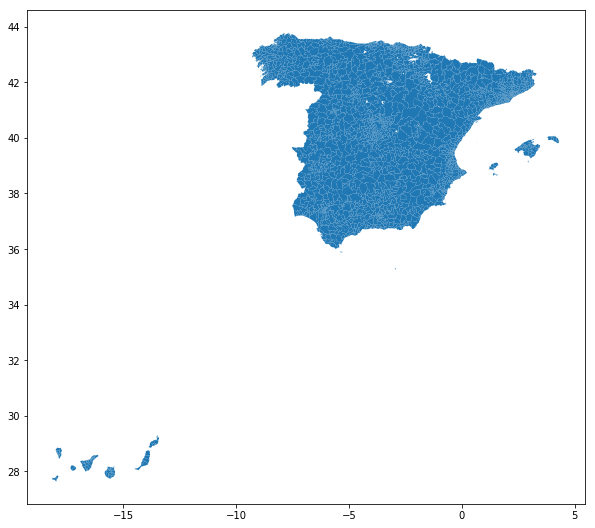

In [52]:
agg_mun_tourist_gdf.plot(figsize=(10,10));

In [53]:
#agg_mun_tourist_gdf.to_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')

### Case II: Cities covering more than one MA 

In [54]:
mas_to_fuse = rel_df[rel_df['municipio'].isin(mun_tourist2_gdf['primary_key'].unique())]['distrito_mitma'].unique()

In [55]:
data_path=os.path.join('/','home', 'fterroso', 'data', 'Spain-INE-mobility-study-2020', 'muestra1')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')
e_date = datetime.datetime.strptime('2021-04-30', '%Y-%m-%d')
i_date_str= i_date.strftime('%Y%m%d')
e_date_str= e_date.strftime('%Y%m%d')

In [56]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=5, n_workers=20)
client

/home/fterroso/python/lib/python3.6/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44445 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:44107 Dashboard: http://127.0.0.1:44445/status,Cluster Workers: 20 Cores: 100 Memory: 135.09 GB


In [57]:
flow_oo= dd.read_csv(os.path.join('data','mobility', f'flow_oo_{i_date_str}_{e_date_str}.csv'), 
                     dtype={'fecha':str, 'periodo':str}).set_index('Unnamed: 0')
flow_oo = flow_oo.drop(['actividad_origen', 'actividad_destino', 'periodo','residencia', 'edad', 'distancia', 'viajes_km'],axis=1)

In [58]:
flow_oo

,fecha,origen,destino,viajes
npartitions=22,,,,
0,object,object,object,float64
41777,...,...,...,...
...,...,...,...,...
898999,...,...,...,...
962561,...,...,...,...


In [59]:
flow_oo.head()

,fecha,origen,destino,viajes
Unnamed: 0,,,,
0,20201106,08194,22112_AM,5.320
0,20200904,48082,08305,12.478
0,20201025,38008,3802302,17.967
0,20200731,39040,0812403,6.383
0,20200911,37313_AM,4109505,13.502


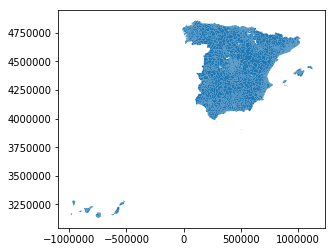

In [60]:
origins = flow_oo['origen'].unique().compute()
zones_gdf.loc[origins].plot();

In [61]:
flow_oo[(flow_oo['origen']=='0200301')].compute()

,fecha,origen,destino,viajes
Unnamed: 0,,,,
11911,20200412,0200301,14049,7.729
11935,20200405,0200301,23010,6.917
12453,20200410,0200301,03058_AM,7.274
12458,20200410,0200301,2807921,8.579
12712,20200419,0200301,08269_AM,10.397
...,...,...,...,...
34170,20200703,0200301,4625004,10.783
34175,20200703,0200301,4625011,4.328
34176,20200703,0200301,4625011,13.909


In [62]:
flow_oo[(flow_oo['destino']=='0200301')].compute()

,fecha,origen,destino,viajes
Unnamed: 0,,,,
103,20210412,2807915,0200301,10.803
120,20201202,2807906,0200301,7.258
287,20201129,13019,0200301,16.137
298,20200711,44216,0200301,9.097
322,20200502,30021,0200301,5.195
...,...,...,...,...
959069,20200621,5029712,0200301,7.627
959286,20200702,4625003,0200301,6.026
959304,20200809,1808702,0200301,9.854


In [63]:
'0200301' in mas_to_fuse

True

In [64]:
rel_df.head()

,distrito_mitma,municipio
0,01001_AM,01001
1,01001_AM,01009
2,01001_AM,01013
3,01001_AM,01021
4,01001_AM,01027


In [65]:
rel_df[rel_df['distrito_mitma']=='0200301']

,distrito_mitma,municipio
407,0200301,02003


Case A: Origin an destination belong a multi-MA city

In [66]:
flow_oo1= flow_oo[(flow_oo['origen'].isin(mas_to_fuse))]
flow_oo1= flow_oo1[flow_oo1['destino'].isin(mas_to_fuse)]

In [67]:
flow_oo1 = flow_oo1.merge(rel_df, how='left', left_on='origen', right_on='distrito_mitma')
flow_oo1 = flow_oo1.drop('origen distrito_mitma'.split(), axis=1)
flow_oo1 = flow_oo1.rename(columns={'municipio':'origen'})

In [68]:
flow_oo1 = flow_oo1.merge(rel_df, how='left', left_on='destino', right_on='distrito_mitma')
flow_oo1 = flow_oo1.drop('destino distrito_mitma'.split(), axis=1)
flow_oo1 = flow_oo1.rename(columns={'municipio':'destino'})

In [69]:
flow_oo1 = flow_oo1.groupby(['fecha','origen', 'destino']).viajes.sum().compute()
flow_oo1= flow_oo1.to_frame()

In [70]:
flow_oo1 = flow_oo1.reset_index()

In [71]:
flow_oo1.head()

,fecha,origen,destino,viajes
0,20200401,01059,02003,11.494
1,20200401,01059,08019,27.952
2,20200401,01059,08124,8.728
3,20200401,01059,23050,7.969
4,20200401,01059,28005,8.166


In [72]:
flow_oo1[flow_oo1['origen']=='02003']

,fecha,origen,destino,viajes
9,20200401,02003,03014,19.645
10,20200401,02003,03065,23.053
11,20200401,02003,03099,27.352
12,20200401,02003,16078,20.913
13,20200401,02003,23050,36.078
...,...,...,...,...
74507,20210430,02003,28065,19.626
74508,20210430,02003,28074,7.137
74509,20210430,02003,28148,8.248
74510,20210430,02003,33024,14.467


In [73]:
flow_oo1.groupby('fecha origen'.split()).size()

fecha     origen
20200401  01059      9
          02003     14
          03014      9
          03031      2
          03065     10
                    ..
20210430  48044      8
          49275     12
          50297     76
          51001     15
          52001     14
Length: 49008, dtype: int64

Case B: Only origin belongs to a multi-MA city

In [74]:
flow_oo2= flow_oo[(flow_oo['origen'].isin(mas_to_fuse))]
flow_oo2= flow_oo2[~flow_oo2['destino'].isin(mas_to_fuse)]

In [75]:
flow_oo2 = flow_oo2.merge(rel_df, how='left', left_on='origen', right_on='distrito_mitma')
flow_oo2 = flow_oo2.drop('origen distrito_mitma'.split(), axis=1)
flow_oo2 = flow_oo2.rename(columns={'municipio':'origen'})

In [76]:
flow_oo2 = flow_oo2.groupby(['fecha','origen', 'destino']).viajes.sum().compute()
flow_oo2=flow_oo2.to_frame()

flow_oo2 = flow_oo2.reset_index()

In [77]:
flow_oo2.head()

,fecha,origen,destino,viajes
0,20200401,01059,03140,8.758
1,20200401,01059,08180,3.743
2,20200401,01059,08263,21.281
3,20200401,01059,08305,13.490
4,20200401,01059,10148,2.930


Case C: Only destination belongs to a multi-MA city

In [78]:
flow_oo3= flow_oo[~flow_oo['origen'].isin(mas_to_fuse)]
flow_oo3= flow_oo3[flow_oo3['destino'].isin(mas_to_fuse)]
flow_oo3 = flow_oo3.merge(rel_df, how='left', left_on='destino', right_on='distrito_mitma')
flow_oo3 = flow_oo3.drop('destino distrito_mitma'.split(), axis=1)
flow_oo3 = flow_oo3.rename(columns={'municipio':'destino'})

flow_oo3

,fecha,origen,viajes,destino
npartitions=22,,,,
,object,object,float64,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [79]:
flow_oo3.head()

,fecha,origen,viajes,destino
0,20201025,38008,17.967,38023
1,20200731,39040,6.383,08124
2,20200911,37313_AM,13.502,41095
3,20200830,30003,12.628,03014
4,20200716,42043_AM,9.615,28079


In [80]:
flow_oo3 = flow_oo3.groupby(['fecha','origen', 'destino']).viajes.sum(split_out=4).compute()
flow_oo3=flow_oo3.to_frame()

flow_oo3 = flow_oo3.reset_index()

flow_oo3.head()

,fecha,origen,destino,viajes
0,20200401,01001_AM,28113,25.382
1,20200401,01001_AM,28148,30.451
2,20200401,01058_AM,09059,4.862
3,20200401,01901_AM,23050,7.542
4,20200401,01901_AM,28161,15.251


In [81]:
flow_oo3[flow_oo3['origen']=='02003']

,fecha,origen,destino,viajes


In [82]:
flow_oo3[flow_oo3['destino']=='02003']

,fecha,origen,destino,viajes
96,20200402,13039,02003,11.829
98,20200402,13052,02003,9.857
99,20200402,13053_AM,02003,17.016
175,20200403,13071,02003,15.989
206,20200403,45161,02003,7.975
...,...,...,...,...
2552689,20210429,46082,02003,7.222
2552716,20210430,16112_AM,02003,6.732
2552725,20210430,16133,02003,10.794
2552776,20210430,46007_AM,02003,16.066


In [83]:
'28079' in mas_to_fuse

False

Case D: Neither origin and destination belong to a multi-MA city

In [84]:
flow_oo4= flow_oo[~flow_oo['origen'].isin(mas_to_fuse)]
flow_oo4= flow_oo4[~flow_oo4['destino'].isin(mas_to_fuse)]

flow_oo4 = flow_oo4.groupby(['fecha','origen', 'destino']).viajes.sum(split_out=4).compute()
flow_oo4=flow_oo4.to_frame()

flow_oo4 = flow_oo4.reset_index()

flow_oo4.head()

,fecha,origen,destino,viajes
0,20200401,01001_AM,09439_AM,10.795
1,20200401,01001_AM,21044,12.946
2,20200401,01001_AM,25217,34.847
3,20200401,01001_AM,28009,8.015
4,20200401,01001_AM,2813401,7.384


#### Aggregate other-other sub-flows

In [85]:
flow_oo_mun = pd.concat([flow_oo1, flow_oo2, flow_oo3, flow_oo4])

In [86]:
flow_oo_mun.head()

,fecha,origen,destino,viajes
0,20200401,01059,02003,11.494
1,20200401,01059,08019,27.952
2,20200401,01059,08124,8.728
3,20200401,01059,23050,7.969
4,20200401,01059,28005,8.166


In [87]:
'01001_AM' in mas_to_fuse, '09194_AM' in mas_to_fuse

(False, False)

In [88]:
flow_oo_mun[(flow_oo_mun['origen']=='01001_AM')&(flow_oo_mun['destino']=='09194_AM') & (flow_oo_mun['fecha']=='20200401')]

,fecha,origen,destino,viajes
1681205,20200401,01001_AM,09194_AM,18.475


In [89]:
flow_oo_mun.groupby('fecha origen destino'.split()).count().value_counts()

viajes
1         12609529
dtype: int64

In [90]:
flow_oo_mun[flow_oo_mun['origen']=='02003']

,fecha,origen,destino,viajes
9,20200401,02003,03014,19.645
10,20200401,02003,03065,23.053
11,20200401,02003,03099,27.352
12,20200401,02003,16078,20.913
13,20200401,02003,23050,36.078
...,...,...,...,...
248384,20210430,02003,46207,4.984
248385,20210430,02003,46211_AM,13.330
248386,20210430,02003,46230,7.467
248387,20210430,02003,46233,16.838


In [91]:
flow_oo_mun[flow_oo_mun['destino']=='02003']

,fecha,origen,destino,viajes
0,20200401,01059,02003,11.494
42,20200401,28161,02003,5.313
119,20200402,28148,02003,2.826
246,20200403,45168,02003,10.687
348,20200406,28161,02003,4.531
...,...,...,...,...
2552689,20210429,46082,02003,7.222
2552716,20210430,16112_AM,02003,6.732
2552725,20210430,16133,02003,10.794
2552776,20210430,46007_AM,02003,16.066


In [92]:
flow_oo_mun.to_csv(os.path.join('data', 'mobility', 'flow_oo_mun.csv'))

In [93]:
def homogenize_flows_by_mun_fn(flow_, rel_mul_mun):

    #Case A: Origin an destination belong a multi-MA city

    flow_1= flow_[(flow_['origen'].isin(mas_to_fuse))]
    flow_1= flow_1[flow_1['destino'].isin(mas_to_fuse)]

    flow_1 = flow_1.merge(rel_mul_mun, how='left', left_on='origen', right_on='distrito_mitma')
    flow_1 = flow_1.drop('origen distrito_mitma'.split(), axis=1)
    flow_1 = flow_1.rename(columns={'municipio':'origen'})

    flow_1 = flow_1.groupby(['fecha','origen', 'destino']).viajes.sum(split_out=4).compute()
    flow_1=flow_1.to_frame()

    flow_1 = flow_1.reset_index()

    flow_1 = flow_1.merge(rel_mul_mun, how='left', left_on='destino', right_on='distrito_mitma')
    flow_1 = flow_1.drop('destino distrito_mitma'.split(), axis=1)
    flow_1 = flow_1.groupby(['fecha','origen', 'municipio']).viajes.sum()
    flow_1 = flow_1.to_frame()
    flow_1 = flow_1.reset_index()
    flow_1 = flow_1.rename(columns={'municipio':'destino'})

    flow_1.groupby('fecha origen'.split()).size()

    #Case B: Only origin belongs to a multi-MA city

    flow_2= flow_[(flow_['origen'].isin(mas_to_fuse))]
    flow_2= flow_2[~flow_2['destino'].isin(mas_to_fuse)]

    flow_2 = flow_2.merge(rel_mul_mun, how='left', left_on='origen', right_on='distrito_mitma')
    flow_2 = flow_2.drop('origen distrito_mitma'.split(), axis=1)
    flow_2 = flow_2.rename(columns={'municipio':'origen'})

    flow_2 = flow_2.groupby(['fecha','origen', 'destino']).viajes.sum(split_out=4).compute()
    flow_2=flow_2.to_frame()

    flow_2 = flow_2.reset_index()

    #Case C: Only destination belongs to a multi-MA city

    flow_3= flow_[~flow_['origen'].isin(mas_to_fuse)]
    flow_3= flow_3[flow_3['destino'].isin(mas_to_fuse)]
    flow_3 = flow_3.merge(rel_mul_mun, how='left', left_on='destino', right_on='distrito_mitma')
    flow_3 = flow_3.drop('destino distrito_mitma'.split(), axis=1)
    flow_3 = flow_3.rename(columns={'municipio':'destino'})

    flow_3 = flow_3.groupby(['fecha','origen', 'destino']).viajes.sum(split_out=4).compute()
    flow_3=flow_3.to_frame()

    flow_3 = flow_3.reset_index()


    #Case D: Neither origin and destination belong to a multi-MA city

    flow_4= flow_[~flow_['origen'].isin(mas_to_fuse)]
    flow_4= flow_4[~flow_4['destino'].isin(mas_to_fuse)]

    flow_4 = flow_4.groupby(['fecha','origen', 'destino']).viajes.sum(split_out=4).compute()
    flow_4=flow_4.to_frame()

    flow_4 = flow_4.reset_index()

    ### Aggregate OO flows

    flow_mun = pd.concat([flow_1, flow_2, flow_3, flow_4])
    
    return flow_mun

### Aggregate home-other flows

In [94]:
flow_ho= dd.read_csv(os.path.join('data','mobility', f'flow_ho_{i_date_str}_{e_date_str}.csv'), 
                     dtype={'fecha':str, 'periodo':str}).set_index('Unnamed: 0')
flow_ho = flow_ho.drop(['actividad_origen', 'actividad_destino', 'periodo','residencia', 'edad', 'distancia', 'viajes_km'],axis=1)

flow_ho

,fecha,origen,destino,viajes
npartitions=11,,,,
0,object,object,object,float64
55074,...,...,...,...
...,...,...,...,...
859302,...,...,...,...
962872,...,...,...,...


In [95]:
agg_flow_ho =homogenize_flows_by_mun_fn(flow_ho, rel_df)
agg_flow_ho.head()

,fecha,origen,destino,viajes
0,20200401,01059,08124,12.325
1,20200401,01059,14021,3.577
2,20200401,01059,28005,13.490
3,20200401,02003,03014,24.992
4,20200401,02003,03099,29.446


In [96]:
agg_flow_ho.groupby('fecha origen destino'.split()).count().value_counts()

viajes
1         5764409
dtype: int64

In [97]:
agg_flow_ho.to_csv(os.path.join('data', 'mobility', 'flow_ho_mun.csv'))

### Aggregate others-home flow

In [98]:
flow_oh= dd.read_csv(os.path.join('data','mobility', f'flow_oh_{i_date_str}_{e_date_str}.csv'), 
                     dtype={'fecha':str, 'periodo':str}).set_index('Unnamed: 0')
flow_oh = flow_oh.drop(['actividad_origen', 'actividad_destino', 'periodo','residencia', 'edad', 'distancia', 'viajes_km'],axis=1)
flow_oh

,fecha,origen,destino,viajes
npartitions=11,,,,
0,object,object,object,float64
62571,...,...,...,...
...,...,...,...,...
873594,...,...,...,...
962871,...,...,...,...


In [99]:
agg_flow_oh =homogenize_flows_by_mun_fn(flow_oh, rel_df)
agg_flow_oh.head()

,fecha,origen,destino,viajes
0,20200401,01059,50297,11.309
1,20200401,02003,03009,3.718
2,20200401,02003,03065,10.926
3,20200401,02003,03099,4.410
4,20200401,02003,03133,6.240


In [100]:
agg_flow_oh.groupby('fecha origen destino'.split()).count().value_counts()

viajes
1         5982693
dtype: int64

In [101]:
agg_flow_oh.to_csv(os.path.join('data', 'mobility', 'flow_oh_mun.csv'))

### Aggregate regular flows

In [127]:
reg_flow= dd.read_csv(os.path.join('data','mobility', f'reg_flow_{i_date_str}_{e_date_str}.csv'), 
                     dtype={'fecha':str, 'periodo':str}).set_index('Unnamed: 0')
reg_flow = reg_flow.drop(['actividad_origen', 'actividad_destino', 'periodo','residencia', 'edad', 'distancia', 'viajes_km'],axis=1)

In [128]:
agg_reg_flow =homogenize_flows_by_mun_fn(reg_flow, rel_df)
agg_reg_flow.head()

,fecha,origen,destino,viajes
0,20200401,01059,01059,38955.878
1,20200401,01059,20069,10.147
2,20200401,01059,26089,30.635
3,20200401,01059,31201,19.799
4,20200401,01059,48013,14.038


We ensure that there is not duplicate OD tupes by counting their number. If only '1' appears as possible value, all is ok.

In [129]:
agg_reg_flow.groupby('fecha origen destino'.split()).count().value_counts()

viajes
1         16184430
dtype: int64

In [130]:
agg_reg_flow.to_csv(os.path.join('data', 'mobility', 'reg_flow_mun.csv'))

## Check the integrity of the aggregation

In [111]:
agg_flow_oh = pd.read_csv(os.path.join('data', 'mobility', 'flow_oh_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str})
agg_flow_ho= pd.read_csv(os.path.join('data', 'mobility', 'flow_ho_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str})
agg_flow_oo= pd.read_csv(os.path.join('data', 'mobility', 'flow_oo_mun.csv'), index_col=0, 
                         dtype={'origen':str, 'destino':str})

/home/fterroso/python/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [112]:
agg_flow_oo[agg_flow_oo['origen']=='02003']

,fecha,origen,destino,viajes
9,20200401,02003,03014,19.645
10,20200401,02003,03065,23.053
11,20200401,02003,03099,27.352
12,20200401,02003,16078,20.913
13,20200401,02003,23050,36.078
...,...,...,...,...
248384,20210430,02003,46207,4.984
248385,20210430,02003,46211_AM,13.330
248386,20210430,02003,46230,7.467
248387,20210430,02003,46233,16.838


In [113]:
agg_flow_oo[agg_flow_oo['destino']=='02003']

,fecha,origen,destino,viajes
0,20200401,01059,02003,11.494
42,20200401,28161,02003,5.313
119,20200402,28148,02003,2.826
246,20200403,45168,02003,10.687
348,20200406,28161,02003,4.531
...,...,...,...,...
2552689,20210429,46082,02003,7.222
2552716,20210430,16112_AM,02003,6.732
2552725,20210430,16133,02003,10.794
2552776,20210430,46007_AM,02003,16.066


In [114]:
agg_mun_tourist_gdf= gpd.read_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')
agg_mun_tourist_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803..."
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42..."
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((-3.00076 43.06800, -3.00853 43.06362..."
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((-2.48257 42.49991, -2.48180 42..."
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658..."


In [115]:
agg_mun_tourist_gdf['primary_key'].nunique()

2208

In [116]:
agg_flow_oo['origen'].nunique(), agg_flow_oo['destino'].nunique(),

(2201, 2201)

In [117]:
agg_flow_oh['origen'].nunique(), agg_flow_oh['destino'].nunique()

(2201, 2201)

In [118]:
agg_flow_ho['origen'].nunique(), agg_flow_ho['destino'].nunique()

(2201, 2201)

In [119]:
agg_flow_oh

,fecha,origen,destino,viajes
0,20200401,01059,50297,11.309
1,20200401,02003,03009,3.718
2,20200401,02003,03065,10.926
3,20200401,02003,03099,4.410
4,20200401,02003,03133,6.240
...,...,...,...,...
2507107,20210430,46031,43094_AM,9.302
2507108,20210430,46035,16175,10.713
2507109,20210430,46042_AM,30019,12.967
2507110,20210430,46042_AM,3002701,8.254


In [120]:
origenes = agg_flow_oo['origen'].unique()
len(origenes)

2201

### Covered cities as origins

In [121]:
gdf =agg_mun_tourist_gdf[agg_mun_tourist_gdf['primary_key'].isin(origenes)]

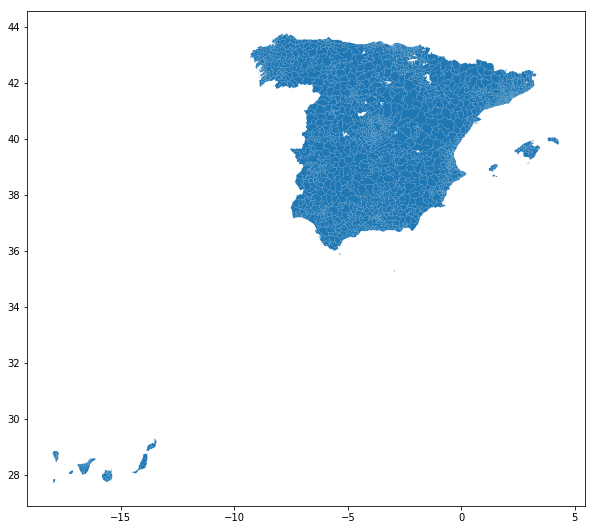

In [122]:
gdf.plot(figsize=(10,10));

### Cities acting as destinations

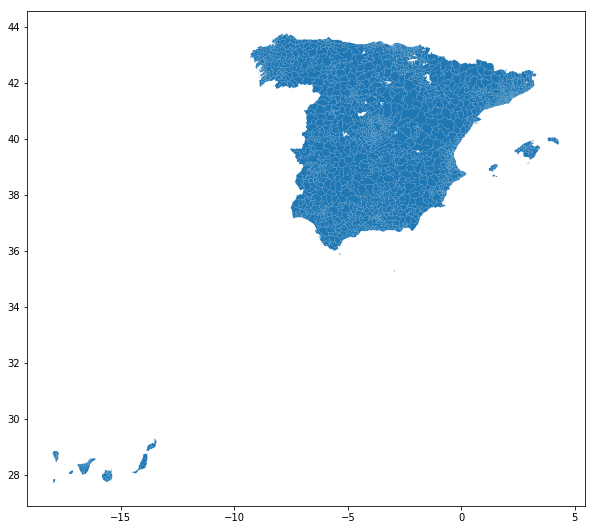

In [123]:
dest = agg_flow_oo['destino'].unique()
gdf =agg_mun_tourist_gdf[agg_mun_tourist_gdf['primary_key'].isin(dest)]
gdf.plot(figsize=(10,10));

In [124]:
print("That's all folks")

That's all folks
